In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house = pd.read_excel('Housing Dataset.xlsx')

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   area       545 non-null    int64
 1   bedrooms   545 non-null    int64
 2   bathrooms  545 non-null    int64
 3   stories    545 non-null    int64
 4   parking    545 non-null    int64
 5   Year       545 non-null    int64
 6   price      545 non-null    int64
dtypes: int64(7)
memory usage: 29.9 KB


### 1. Load the housing dataset using pandas and display the first 10 rows.

In [6]:
house.head(10)

,area,bedrooms,bathrooms,stories,parking,Year,price
0,7420,4,2,3,2,2015,13300000
1,8960,4,4,4,3,2015,12250000
2,9960,3,2,2,2,2023,12250000
3,7500,4,2,2,3,2014,12215000
4,7420,4,1,2,2,2011,11410000
5,7500,3,3,1,2,2013,10850000
6,8580,4,3,4,2,2012,10150000
7,16200,5,3,2,0,2023,10150000
8,8100,4,1,2,2,2013,9870000
9,5750,3,2,4,1,2015,9800000


### 2. Check for:
### o Missing values
### o Summary statistics (mean, median, std, etc.)

In [8]:
house.isnull().sum()

area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
Year         0
price        0
dtype: int64

In [9]:
house.describe()

,area,bedrooms,bathrooms,stories,parking,Year,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,2012.629358,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.912195,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,2010.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,2011.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,2013.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,2014.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,2023.000000,1.330000e+07


3. Explore the relationship between features and price using:   
o Correlation matrix  
o Scatter plots (e.g., area vs price, bedrooms vs price)

In [11]:
# Calculate the correlation matrix
correlation_matrix = house.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,area,bedrooms,bathrooms,stories,parking,Year,price
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.037638,0.535997
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,0.067675,0.366494
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.099142,0.517545
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.055089,0.420712
parking,0.352980,0.139270,0.177496,0.045547,1.000000,-0.055673,0.384394
Year,0.037638,0.067675,0.099142,0.055089,-0.055673,1.000000,0.063914
price,0.535997,0.366494,0.517545,0.420712,0.384394,0.063914,1.000000


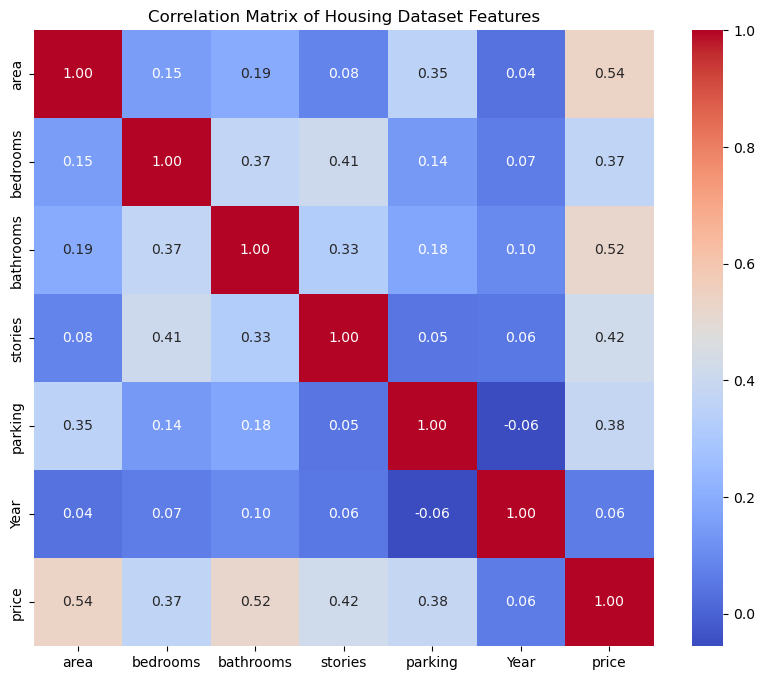

In [12]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Dataset Features')
plt.show()

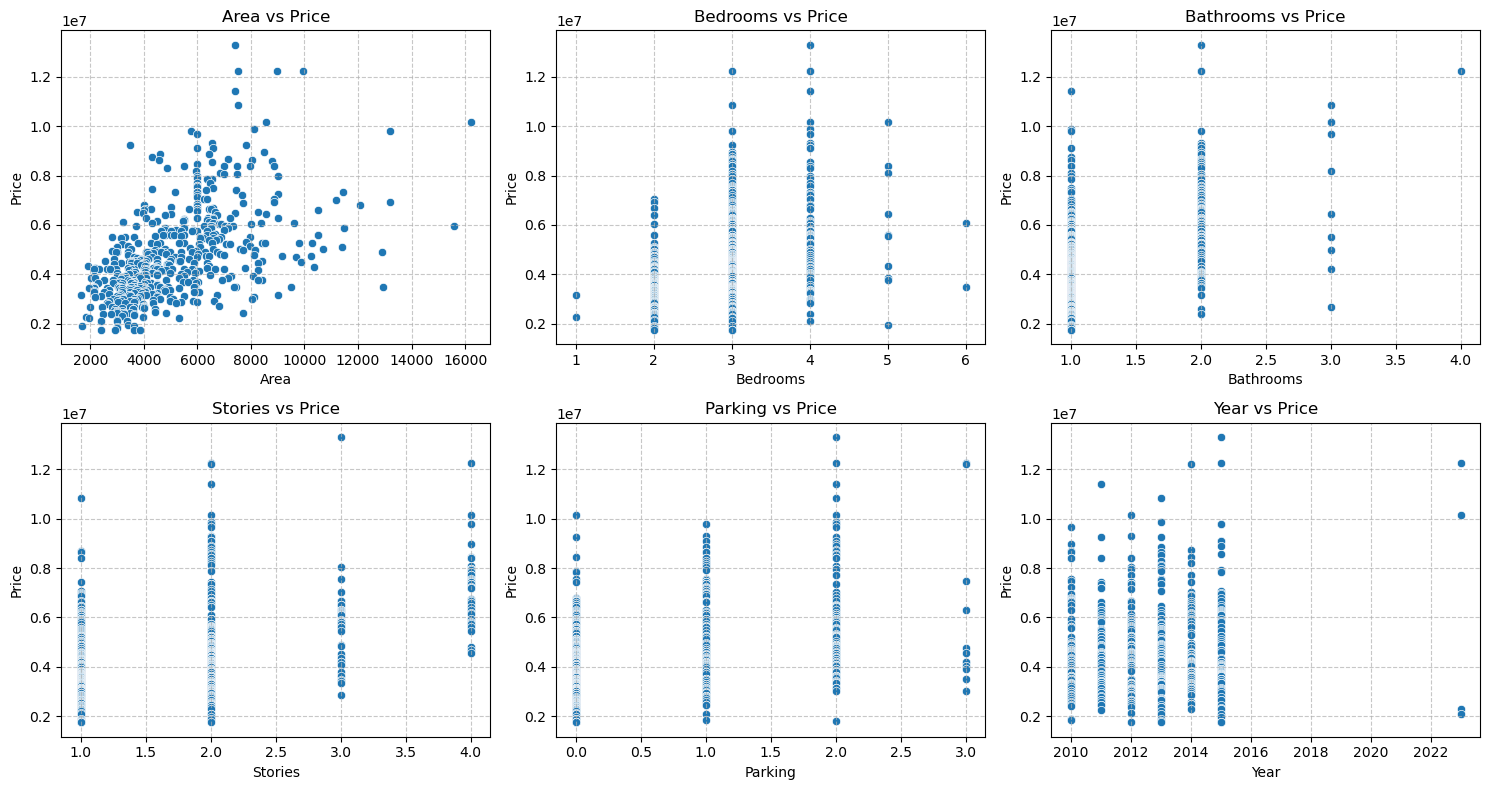

In [13]:
features = house.drop(columns=['price']).columns
n_features = len(features)
n_cols = 3 # Number of columns for subplots
n_rows = 2 # Calculate number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=house[feature], y=house['price'])
    plt.title(f'{feature.capitalize()} vs Price')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

4. Make Use of Cross Validations  
o cross_val_score,  
o GridSearch CV   
o RandomizedSearchCV


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Define features (X) and target (y)
X = house.drop('price', axis=1)
y = house['price']

# Initialize a Linear Regression model
model = LinearRegression()

# Create a KFold object with shuffle=True
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Pass the 'kf' object to the 'cv' parameter
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("Cross-Validation R2 Scores:", scores)
print("Mean R2:", scores.mean())

Cross-Validation R2 Scores: [0.53950886 0.59128467 0.31217051 0.56888283 0.53493911]
Mean R2: 0.5093571960886635


5. Split the dataset into:

*  Feature matrix X

*   Target vector y
*   Perform train-test split (80% training, 20% testing).






In [17]:
from sklearn.model_selection import train_test_split

X = house.drop('price', axis=1)
y = house['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Train a regression model using scikit-learn (choose at least one):


*Linear Regression    
*Random Forest Regressor    
*Gradient Boosting Regressor



In [19]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

7. Evaluate the model using:    
• MAE     
• MSE     
• RMSE      
• R2 score

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 1132566.3761999065
Mean Squared Error (MSE): 2327584807849.0186
Root Mean Squared Error (RMSE): 1525642.4246359363
R-squared (R2) Score: 0.5395088614061049


8. Plot:    
• Actual vs Predicted prices (scatter plot)

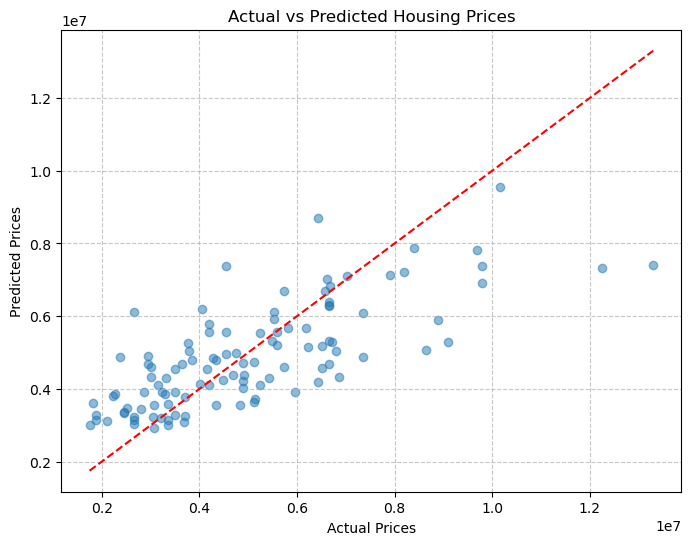

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

9. Load the future housing dataset (2026–2065) containing 500 samples without
prices.

In [25]:
future = pd.read_csv('Future Housing Dataset_2026_2065.csv')
future.head()

,area,bedrooms,bathrooms,stories,parking,Year
0,3282,3,2,2,0,2064
1,4077,4,2,1,0,2054
2,643,1,3,1,1,2040
3,3640,5,1,2,1,2033
4,4991,3,2,1,0,2046


In [26]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   area       500 non-null    int64
 1   bedrooms   500 non-null    int64
 2   bathrooms  500 non-null    int64
 3   stories    500 non-null    int64
 4   parking    500 non-null    int64
 5   Year       500 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


10. Use the trained model to predict the prices of all 500 future houses.

In [28]:
future_prices = model.predict(future)

future['predicted_price'] = future_prices

11. Add the predicted prices to the new dataset and save the results.


In [30]:
future.to_csv('future_housing_predicted_prices.csv', index=False)

12. Plot:   
• Price forecast distribution   
• Yearly average predicted price trend for 2026–2065.

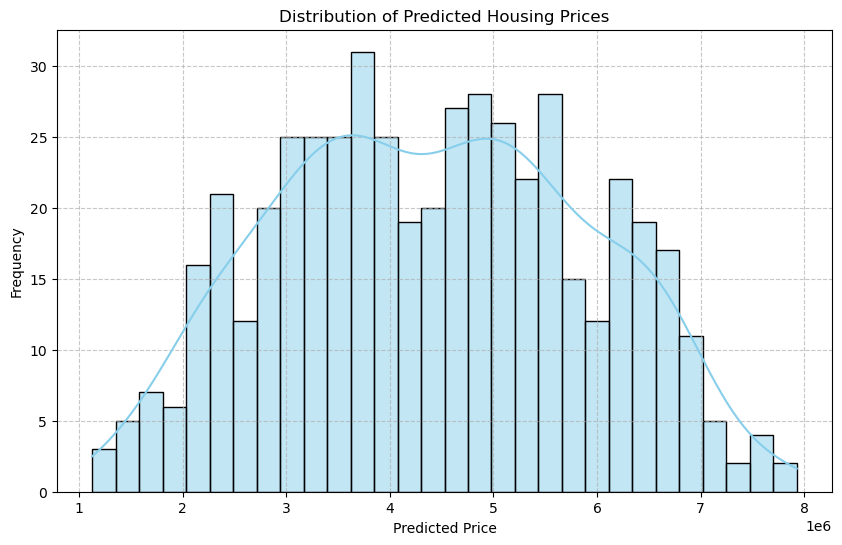

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(future_prices, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Predicted Housing Prices')
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Calculate the yearly average predicted house prices for the future dataset and then plot the trend of these yearly averages.

In [34]:
yearly_avg_prices = future.groupby('Year')['predicted_price'].mean()
print(yearly_avg_prices.head())

Year
2026    4.379079e+06
2027    5.019900e+06
2028    4.969717e+06
2029    5.559607e+06
2030    4.789203e+06
Name: predicted_price, dtype: float64


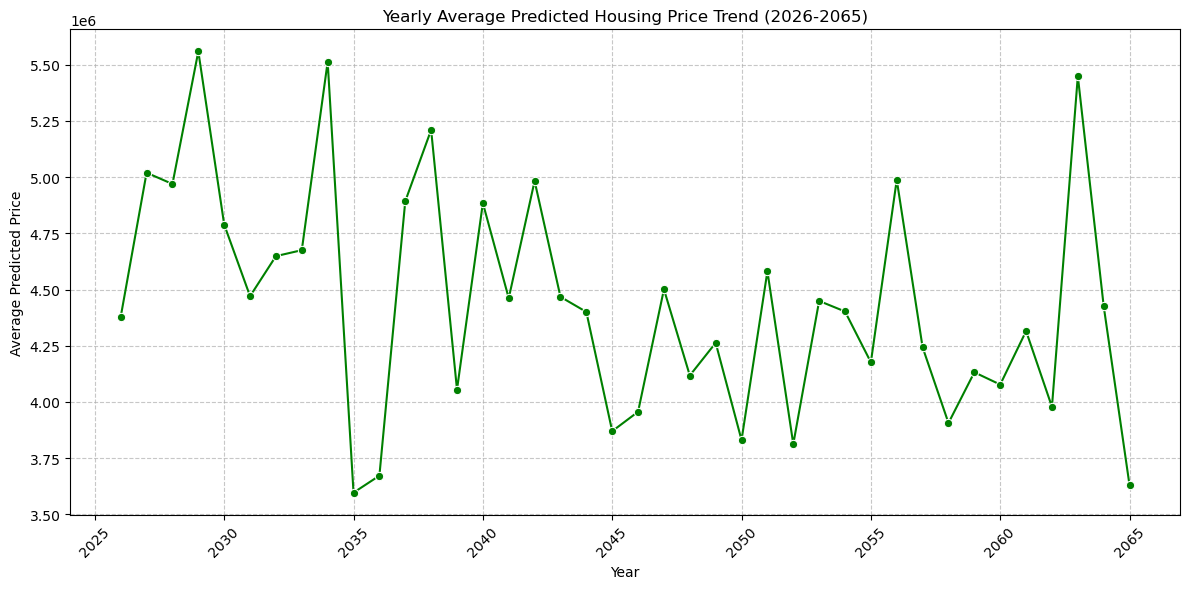

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_avg_prices.index, y=yearly_avg_prices.values, marker='o', color='green')
plt.title('Yearly Average Predicted Housing Price Trend (2026-2065)')
plt.xlabel('Year')
plt.ylabel('Average Predicted Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
*   The yearly average predicted house prices were calculated, showing an average predicted price of approximately \$4.38 million for 2026 and \$5.02 million for 2027.
*   A line plot visually represents the trend of these yearly average predicted housing prices from 2026 to 2065, illustrating their temporal evolution.


In [62]:
# Saving my mode
import joblib

joblib.dump(model, 'house_price_model.pkl') 

print("Model saved to your local folder!")

Model saved to your local folder!
